# import necessary lib

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# before KM clustering

In [2]:
original_df = pd.read_csv("income.csv")
df = original_df
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


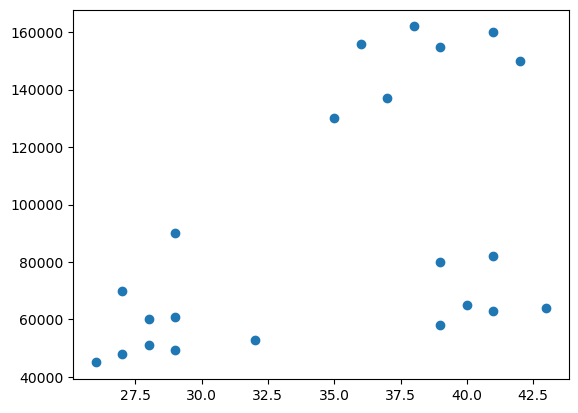

In [3]:
plt.scatter(df.Age,df['Income($)'])

# KM clustering

In [4]:
km =  KMeans(n_clusters = 3)
print(km)

KMeans(n_clusters=3)


In [5]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
print(y_predicted)

[0 0 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 2]


T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


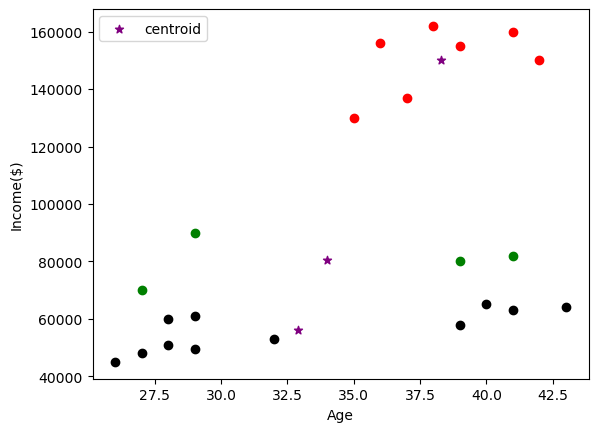

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


# PROBLEM: X_AXIS IS NARROW# Fix: preprocessing dataset with MinMaxScaler() func


In [8]:
scaler = MinMaxScaler()

# scaler.fit(2_dimensional_container) Expected a 2-dimensional container 
# but got <class 'pandas.core.series.Series'> instead. 
# Pass a DataFrame containing a single row
arr2d = []
Age = df['Age']
Income = df['Income($)']

for i in range(len(df)):
    temp = []
    temp = [Age[i], Income[i]]
    arr2d.append(temp)

print(arr2d)



[[27, 70000], [29, 90000], [29, 61000], [28, 60000], [42, 150000], [39, 155000], [41, 160000], [38, 162000], [36, 156000], [35, 130000], [37, 137000], [26, 45000], [27, 48000], [28, 51000], [29, 49500], [32, 53000], [40, 65000], [41, 63000], [43, 64000], [39, 80000], [41, 82000], [39, 58000]]


In [9]:
scaler.fit(arr2d)
arr2d = scaler.transform(arr2d)
print(arr2d)

[[0.05882353 0.21367521]
 [0.17647059 0.38461538]
 [0.17647059 0.13675214]
 [0.11764706 0.12820513]
 [0.94117647 0.8974359 ]
 [0.76470588 0.94017094]
 [0.88235294 0.98290598]
 [0.70588235 1.        ]
 [0.58823529 0.94871795]
 [0.52941176 0.72649573]
 [0.64705882 0.78632479]
 [0.         0.        ]
 [0.05882353 0.02564103]
 [0.11764706 0.05128205]
 [0.17647059 0.03846154]
 [0.35294118 0.06837607]
 [0.82352941 0.17094017]
 [0.88235294 0.15384615]
 [1.         0.16239316]
 [0.76470588 0.2991453 ]
 [0.88235294 0.31623932]
 [0.76470588 0.11111111]]


In [10]:
for i in range(len(arr2d)):
    Age[i] = arr2d[i,0]
    Income[i] = arr2d[i,1]

df['Age'] = Age
df['Income($)'] = Income

y_predicted = km.fit_predict(df[['Age','Income($)']])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8096\176067588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[i] = arr2d[i,0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8096\176067588.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.05882352941176472' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Age[i] = arr2d[i,0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8096\176067588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Income[i] = arr2d[i,1]
C:\Users\Lenovo\AppData\Local\Temp

In [11]:
df['cluster'] = y_predicted
print(df)

        Name       Age  Income($)  cluster
0        Rob  0.058824   0.213675        0
1    Michael  0.176471   0.384615        0
2      Mohan  0.176471   0.136752        0
3     Ismail  0.117647   0.128205        0
4       Kory  0.941176   0.897436        1
5     Gautam  0.764706   0.940171        1
6      David  0.882353   0.982906        1
7     Andrea  0.705882   1.000000        1
8       Brad  0.588235   0.948718        1
9   Angelina  0.529412   0.726496        1
10    Donald  0.647059   0.786325        1
11       Tom  0.000000   0.000000        0
12    Arnold  0.058824   0.025641        0
13     Jared  0.117647   0.051282        0
14     Stark  0.176471   0.038462        0
15    Ranbir  0.352941   0.068376        0
16    Dipika  0.823529   0.170940        2
17  Priyanka  0.882353   0.153846        2
18      Nick  1.000000   0.162393        2
19      Alia  0.764706   0.299145        2
20       Sid  0.882353   0.316239        2
21     Abdul  0.764706   0.111111        2


# After KM clustering

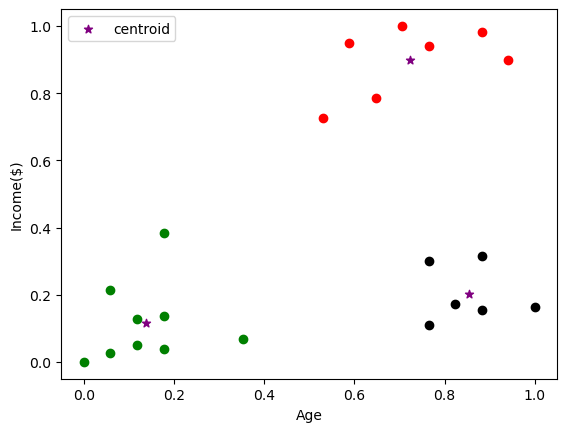

In [12]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# How to determine correct  number of clusters (K) ?
# => Elbow Technique (đồ thị khuỷa tay)
explain: repeat KM in many variety K and watching the changing in Sum of Squared Error(SSE) graph and choose the "elbow" of the graph which will be the best K cluster

In [13]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans (n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

print(sse)

T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

[5.434011511988178, 2.091136388699078, 0.4750783498553096, 0.42015522057314425, 0.30713504184752916, 0.23022348815682742, 0.19402863836402717, 0.1680621918962203, 0.12861136577976257]


T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
T:\apps\T_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

# Elbow Graph

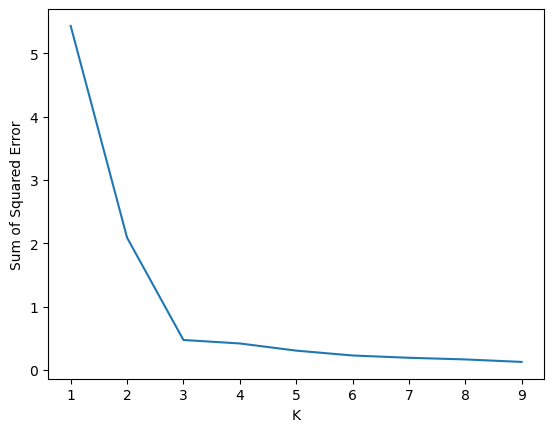

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

=>> As you at K = 3 is the Elbow of the graph so we choose K = 3 to clustering

# CONCLUSION: to determind which K is the best for KM clustering in the big dataset will waste of resources